In [95]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Input, Lambda, Flatten
from keras.models import Sequential
from tensorflow import random
from tensorflow.keras.applications.inception_v3 import preprocess_input
from glob import glob
from keras.models import Model
from keras.applications.vgg16 import VGG16

In [96]:
IMAGE_SIZE = [224, 224]

In [97]:
np.random.seed(42)
random.set_seed(42)

vgg_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [98]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [99]:
# don't train existing weights
for layer in vgg_model.layers:
    layer.trainable = False

In [100]:
folders = glob('/content/drive/My Drive/all_dataset/car_image_dataset/Train/*')

In [101]:
# our layers - you can add more if you want
x = Flatten()(vgg_model.output)

In [103]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg_model.input, outputs=prediction)



In [104]:
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [105]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
from keras.preprocessing.image import ImageDataGenerator

generate_train_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

generate_test_data = ImageDataGenerator(rescale =1./255)

In [107]:
training_dataset = generate_train_data.flow_from_directory('/content/drive/My Drive/all_dataset/car_image_dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_datasetset = generate_test_data.flow_from_directory('/content/drive/My Drive/all_dataset/car_image_dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [108]:
history=model.fit_generator(training_dataset,
                         steps_per_epoch = len(training_dataset),
                         epochs = 100,
                         validation_data = test_datasetset,
                         validation_steps = len(test_datasetset),
                         shuffle=False)

Epoch 1/100
2/2 [==============================] - 1s 512ms/step - loss: 2.2725 - accuracy: 0.2812 - val_loss: 3.1610 - val_accuracy: 0.3448
Epoch 2/100
2/2 [==============================] - 1s 355ms/step - loss: 1.5424 - accuracy: 0.5781 - val_loss: 0.8144 - val_accuracy: 0.6034
Epoch 3/100
2/2 [==============================] - 1s 360ms/step - loss: 0.9741 - accuracy: 0.5938 - val_loss: 1.1809 - val_accuracy: 0.5690
Epoch 4/100
2/2 [==============================] - 1s 360ms/step - loss: 0.6228 - accuracy: 0.7188 - val_loss: 0.6868 - val_accuracy: 0.6897
Epoch 5/100
2/2 [==============================] - 1s 367ms/step - loss: 0.3396 - accuracy: 0.8594 - val_loss: 0.8854 - val_accuracy: 0.5690
Epoch 6/100
2/2 [==============================] - 1s 359ms/step - loss: 0.3677 - accuracy: 0.8438 - val_loss: 0.6047 - val_accuracy: 0.7414
Epoch 7/100
2/2 [==============================] - 1s 367ms/step - loss: 0.1755 - accuracy: 0.9375 - val_loss: 0.5122 - val_accuracy: 0.7931
Epoch 8/100
2

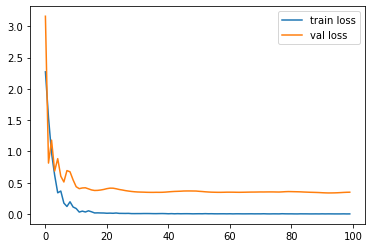

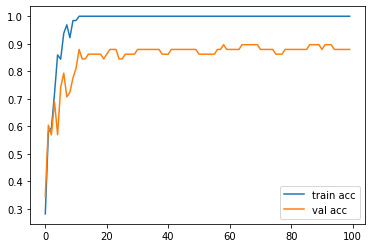

<Figure size 432x288 with 0 Axes>

In [109]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [136]:
from tensorflow.keras.models import load_model

model.save('Car_prediction_model_VGG16.h5')

In [111]:

y_pred = model.predict(test_datasetset)

In [112]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [113]:
from keras.models import load_model
from keras.preprocessing import image

In [114]:
model=load_model('Car_prediction_model_VGG16.h5')


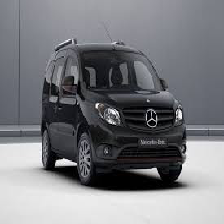

In [132]:
img=image.load_img('/content/drive/My Drive/all_dataset/car_image_dataset/testing/Marcedes/images (4).jpg',target_size=(224,224))
img

In [133]:
x=image.img_to_array(img)
x=x/255

In [134]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [135]:
result=np.argmax(model.predict(img_data), axis=1)
if result == 0:
  prediction ="It's an Audi"
elif result == 1:
  prediction = "It's a Lamborghini"
elif result== 2:
  prediction="It's a Mercedes"

print(prediction)

It's a Mercedes
